In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_data = """Month,Store,Sales
Jan,Store A,12000
Jan,Store B,15000
Feb,Store A,18000
Feb,Store B,17000
Mar,Store A,16000
Mar,Store B,19000
"""

In [3]:
with open('sales_data.csv', 'w') as file:
    file.write(csv_data)

In [4]:
df = pd.read_csv('sales_data.csv')
print("Full DataFrame:\n", df)

Full DataFrame:
   Month    Store  Sales
0   Jan  Store A  12000
1   Jan  Store B  15000
2   Feb  Store A  18000
3   Feb  Store B  17000
4   Mar  Store A  16000
5   Mar  Store B  19000


In [6]:
# Step 3: Total Sales Per Store
total_sales = df.groupby("Store")["Sales"].sum()
print("\nTotal Sales Per Store:\n", total_sales)


Total Sales Per Store:
 Store
Store A    46000
Store B    51000
Name: Sales, dtype: int64


In [7]:
# Identify store with higher total sales
top_store = total_sales.idxmax()
print("\nStore with higher total sales:", top_store)


Store with higher total sales: Store B


In [8]:
# Step 4: Monthly Sales Trend (Both stores combined)
monthly_total = df.groupby("Month")["Sales"].sum()
print("\nMonthly Total Sales:\n", monthly_total)



Monthly Total Sales:
 Month
Feb    35000
Jan    27000
Mar    35000
Name: Sales, dtype: int64


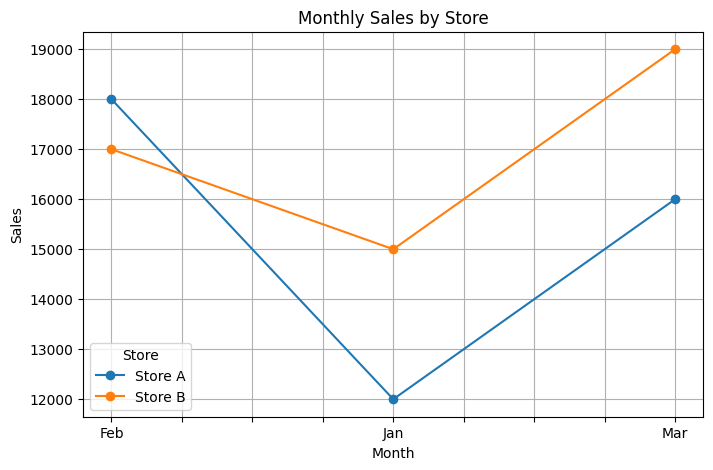

In [24]:
# Step 5: Line Chart - Monthly Sales by Store
pivot_df = df.pivot(index='Month', columns='Store', values='Sales')
pivot_df.plot(kind='line', marker='o', figsize=(8, 5))
plt.title('Monthly Sales by Store')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.legend(title="Store")
plt.show()

In [25]:
# BONUS: Bar Chart - Total Sales Per Store with Data Labels
plt.figure(figsize=(6, 4))  # Safe size to avoid rendering errors

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [26]:
# Convert Series to DataFrame for better plotting
total_sales_df = total_sales.reset_index()

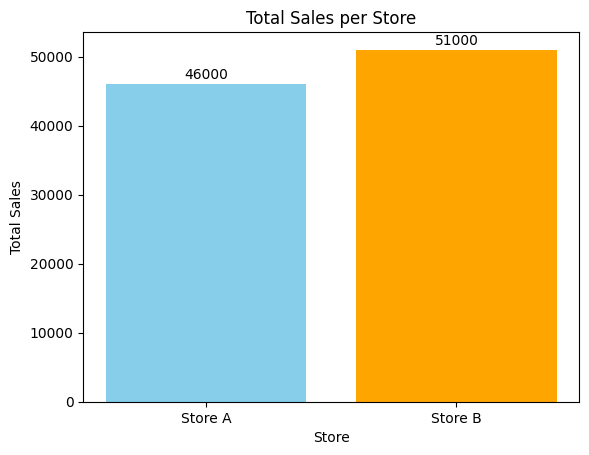

In [30]:
# Plotting
bars = plt.bar(total_sales_df['Store'], total_sales_df['Sales'], color=['skyblue', 'orange'])
plt.title('Total Sales per Store')
plt.ylabel('Total Sales')
plt.xlabel('Store')

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 300, f'{int(height)}', ha='center', va='bottom')

# Save the chart as an image
plt.savefig('sales_chart.png')
plt.show()